In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from pydiffmap import diffusion_map as dm

%matplotlib inline

In [2]:
length_phi = 15
length_Z = 15
sigma = 0.1
m = 10000

phi = length_phi*np.random.rand(m)
xi = np.random.rand(m)
Z = length_Z*np.random.rand(m)
X = 1./6*(phi + sigma*xi)*np.sin(phi)
Y = 1./6*(phi + sigma*xi)*np.cos(phi)

swiss_roll = np.array([X, Y, Z]).transpose()

In [3]:
mydmap = dm.DiffusionMap(n_evecs = 2, epsilon = .1, alpha = 1.0, k=200)
dmap = mydmap.fit_transform(swiss_roll)

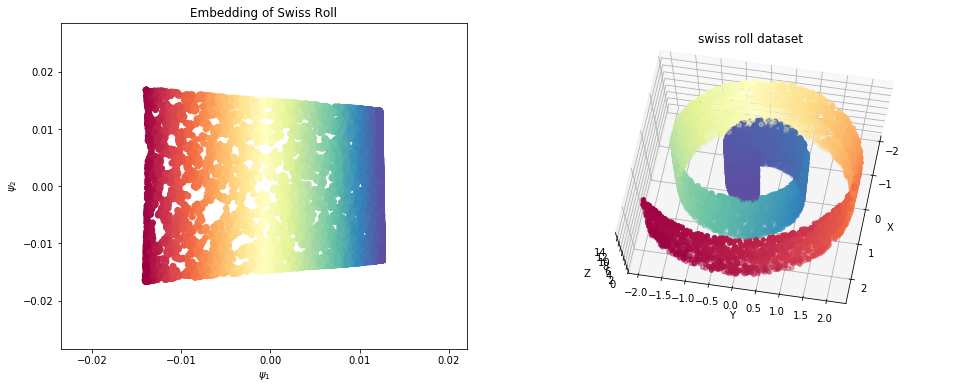

In [4]:
plt.figure(figsize=(16,6))
ax = plt.subplot(121)
ax.scatter(dmap[:,0],dmap[:,1], c=dmap[:,0], cmap=plt.cm.Spectral)
ax.set_title('Embedding of Swiss Roll')
ax.set_xlabel(r'$\psi_1$')
ax.set_ylabel(r'$\psi_2$')
ax.axis('tight')

ax2 = plt.subplot(122,projection='3d')
ax2.scatter(X,Y,Z, c=dmap[:,0], cmap=plt.cm.Spectral)
ax2.view_init(75, 10)
ax2.set_title('swiss roll dataset')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')